<a href="https://colab.research.google.com/github/AmanuelKBr/PROJECTS_1/blob/main/Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Business Problem : Classifying Topics in Amazon Product Reviews
**Objective:** Amazon has a large volume of customer reviews for various products. These reviews contain valuable information about customer experiences, which can be useful for improving product search and providing better recommendations. However, the massive volume of data makes it challenging to manually extract the main topics from the reviews. The goal is to create a Topic Modeling model that automatically identifies and classifies the main topics within the product reviews.

In [1]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter
import nltk
import re
import string

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
sns.set(style='whitegrid')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df = pd.read_csv('amazon_reviews.csv')

In [7]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [8]:
df.shape

(1597, 27)

In [9]:
#Pre Processing
df = df.dropna(subset=['reviews.text'])
df = df.reset_index(drop=True)

In [10]:
df

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces


In [11]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
  text = str(text).lower()
  text = re.sub(r"http\S+|www\S+|https\S+", '', text)
  text = re.sub(r'\[.*?\]\(.*?\)', '', text)
  text = re.sub(r'@\w+', '', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  return text

In [12]:
analyzer = SentimentIntensityAnalyzer()

df['cleaned'] = df['reviews.text'].apply(clean_text)
df['review_length']=df['cleaned'].apply(lambda x: len(x.split()))
df['compound'] = df['cleaned'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [13]:
def classify_sentiment(score):
  if score >= 0.05: return 'Positive'
  elif score <=-0.05: return 'Negative'
  return 'Neutral'

df['sentiment']= df['compound'].apply(classify_sentiment)
df[['cleaned', 'compound', 'sentiment']].head(20)

,cleaned,compound,sentiment
0,i initially had trouble deciding between the p...,0.9879,Positive
1,allow me to preface this with a little history...,0.9881,Positive
2,i am enjoying it so far great for reading had ...,0.4364,Positive
3,i bought one of the first paperwhites and have...,0.9746,Positive
4,i have to say upfront i dont like coroporate ...,0.9980,Positive
5,my previous kindle was a dx this is my second ...,0.2627,Positive
6,allow me to preface this with a little history...,0.9881,Positive
7,just got mine right now looks the same as the ...,0.9205,Positive
8,i initially had trouble deciding between the p...,0.9879,Positive
9,i am enjoying it so far great for reading had ...,0.4364,Positive


In [14]:
df.iloc[0]['cleaned']

'i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used

In [15]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Sentiment Distribution')

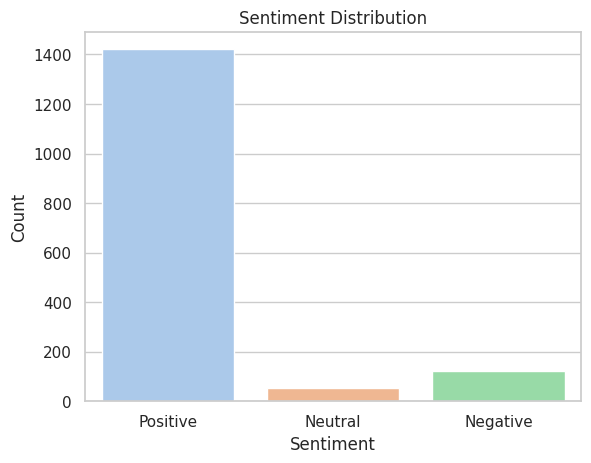

In [19]:
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')


**Positive Sentiment Dominance:** - The overwhelming majority of reviews are classified as Positive (1,421 counts). This suggests that customers are generally satisfied or expressing favorable opinions in the reviews.

**Neutral Sentiment:** - There is a significantly lower number of reviews classified as Neutral (54 counts). This means that few reviews are neither strongly positive nor negative, showing a lack of middle-ground feedback.

**Negative Sentiment:** - A small portion of reviews is classified as Negative (122 counts). While fewer than positive reviews, this indicates that some customers are sharing dissatisfaction or negative experiences.

**Improvements in Balance:** - If the dataset aims to represent a balanced sentiment analysis, it might be necessary to gather or balance more negative or neutral reviews to avoid the positive sentiment dominance. Alternatively, such an imbalance could be a reflection of a generally positive customer experience.

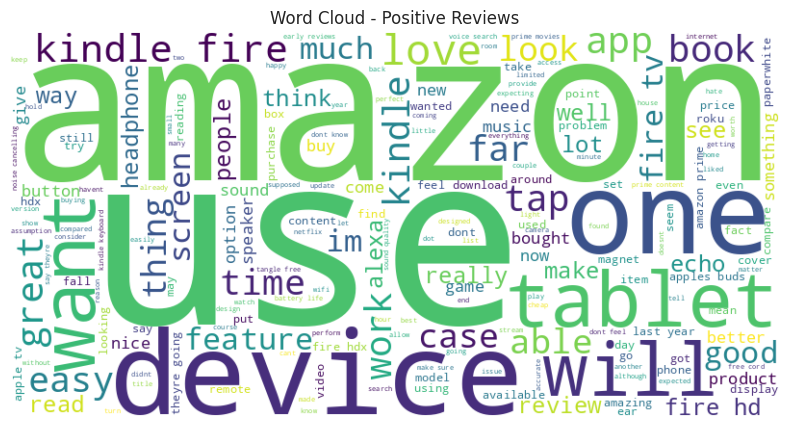

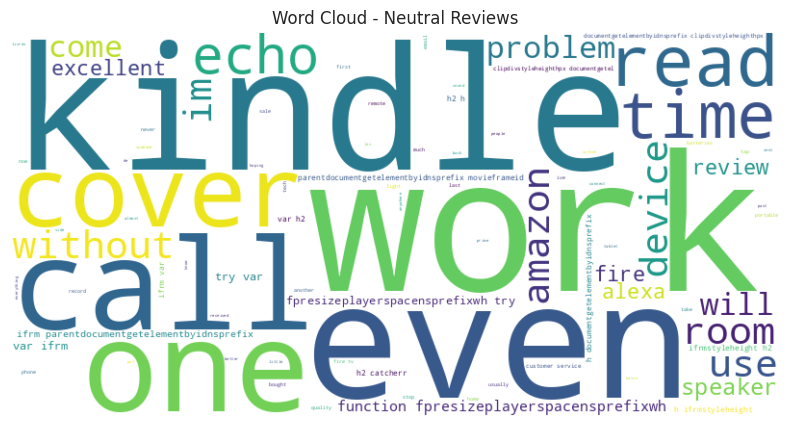

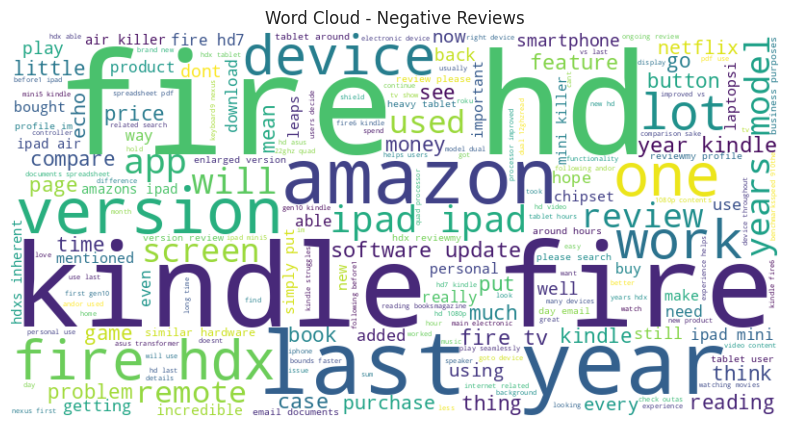

In [20]:
for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned'])
    if text.strip():
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud - {sentiment} Reviews")
        plt.show()

✅ **Business Inference:**
### 🟥 Inference – Negative Reviews Word Cloud

- Specific product models (`fire`, `kindle`, `hdx`) appear frequently – potential pain points.
- Common issues include functionality (`button`, `remote`, `screen`) and outdated versions.
- Mentions of `price` and competitors like `iPad` suggest value concerns and feature gaps.

> **Insight:** Prioritize fixes for device usability and reconsider pricing or feature parity.

### 🟦 Inference – Neutral Reviews Word Cloud

- Neutral tone words like `work`, `even`, `use`, `one` dominate — reviews are factual, not emotional.
- Frequent mentions of `call`, `cover`, `echo`, and `speaker` suggest mixed experiences with accessories and smart features.
- Terms like `problem` and `without` hint at minor limitations, but not deal-breakers.

> **Insight:** Neutral reviews reflect usability feedback — use this data to improve accessory performance and reduce small friction points.

### 🟩 Inference – Positive Reviews Word Cloud

- Strong positive sentiment around `amazon`, `use`, `love`, `tablet`, and `device` — highlighting satisfaction with usability and brand trust.
- Words like `great`, `easy`, `want`, `good`, `feature` signal delight with experience and value.
- Mentions of `alexa`, `app`, `music`, `screen` show that multimedia and smart features are well-received.

> **Insight:** Double down on ease-of-use and multimedia features in marketing — these are driving positive sentiment and brand loyalty.






In [21]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
#tokenisation
def preprocess_tokens(text):
  tokens = word_tokenize(text)
  return [word for word in tokens if word.isalpha() and word not in stop_words]

#Apply to each review
df['tokens']=df['cleaned'].apply(preprocess_tokens)



In [23]:
df.iloc[0]['tokens']

['initially',
 'trouble',
 'deciding',
 'paperwhite',
 'voyage',
 'reviews',
 'less',
 'said',
 'thing',
 'paperwhite',
 'great',
 'spending',
 'money',
 'go',
 'voyagefortunately',
 'friends',
 'owned',
 'ended',
 'buying',
 'paperwhite',
 'basis',
 'models',
 'ppi',
 'dollar',
 'jump',
 'turns',
 'pricey',
 'voyages',
 'page',
 'press',
 'isnt',
 'always',
 'sensitive',
 'fine',
 'specific',
 'setting',
 'dont',
 'need',
 'auto',
 'light',
 'adjustmentits',
 'week',
 'loving',
 'paperwhite',
 'regrets',
 'touch',
 'screen',
 'receptive',
 'easy',
 'use',
 'keep',
 'light',
 'specific',
 'setting',
 'regardless',
 'time',
 'day',
 'case',
 'hard',
 'change',
 'setting',
 'either',
 'youll',
 'changing',
 'light',
 'level',
 'certain',
 'time',
 'day',
 'every',
 'readingalso',
 'glad',
 'went',
 'international',
 'shipping',
 'option',
 'amazon',
 'extra',
 'expense',
 'delivery',
 'time',
 'tracking',
 'didnt',
 'need',
 'worry',
 'customs',
 'may',
 'used',
 'third',
 'party',
 'shi

In [24]:
#Horizontal Barplots
def plot_top_words_horizontal(tokens, sentiment, color):
    all_words = [word for sublist in tokens for word in sublist]
    common_words = Counter(all_words).most_common(20)
    if common_words:
        words, counts = zip(*common_words)
        plt.figure(figsize=(10, 6))
        sns.barplot(y=list(words), x=list(counts), palette=color)
        plt.title(f"Top Words in {sentiment} Reviews")
        plt.xlabel("Frequency")
        plt.ylabel("Words")
        plt.tight_layout()
        plt.show()

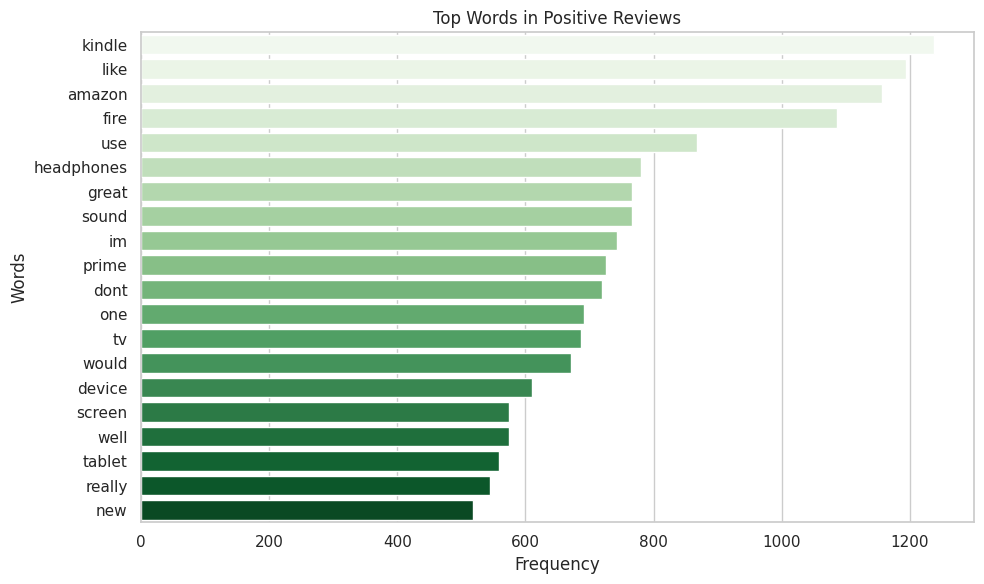

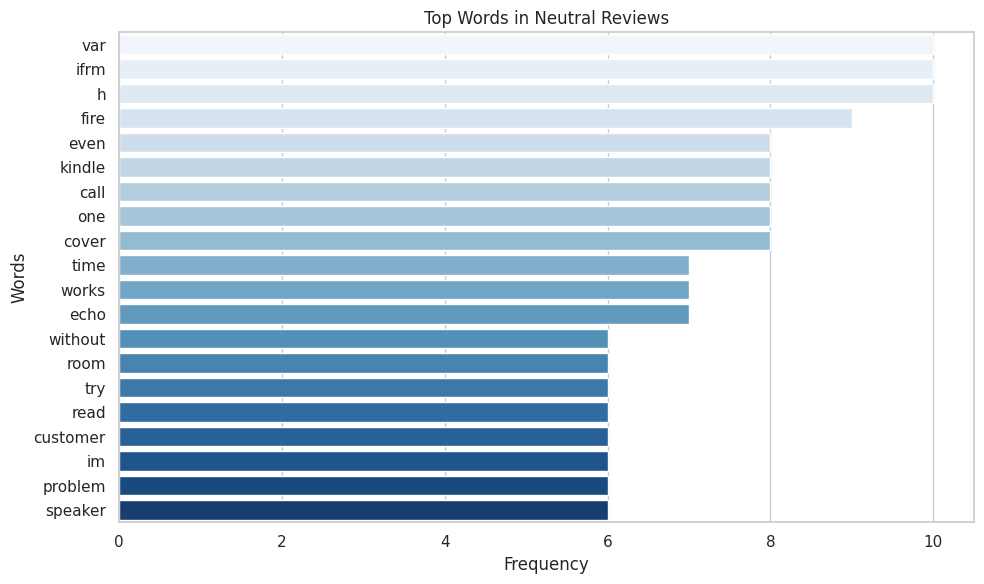

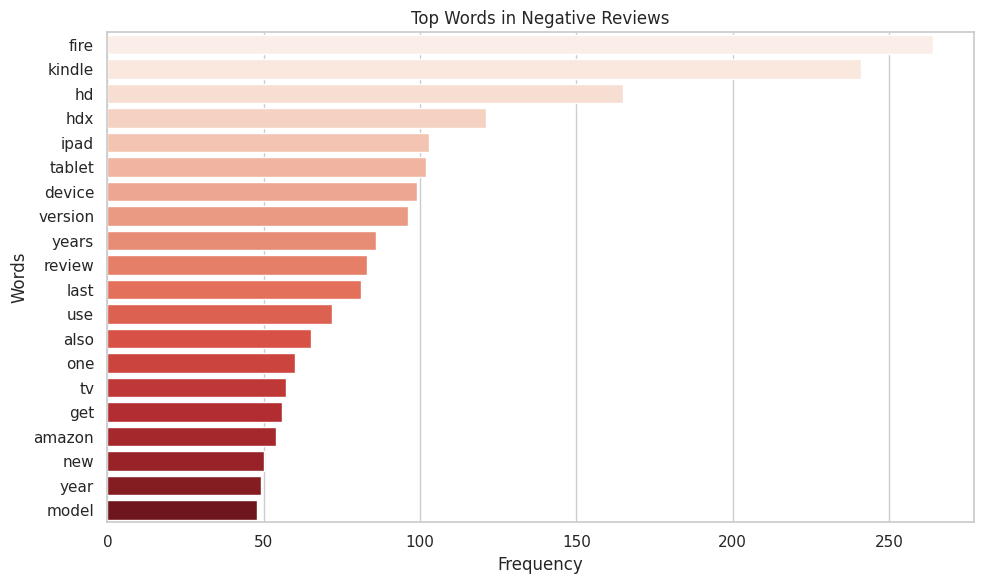

In [25]:
#Generate plots
for sentiment, color in zip(['Positive', 'Neutral', 'Negative'], ['Greens', 'Blues', 'Reds']):
  subset = df[df['sentiment']==sentiment]
  plot_top_words_horizontal(subset['tokens'], sentiment, color)
  plt.show()

Neutral reviews can not be considered within the available dataset.